# Anime GAN

Dataset: [Github Link](https://github.com/bchao1/Anime-Face-Dataset)
```js
@online{chao2019/online,
  author       = {Brian Chao},
  title        = {Anime Face Dataset: a collection of high-quality anime faces.},
  date         = {2019-09-16},
  year         = {2019},
  url          = {https://github.com/bchao1/Anime-Face-Dataset}
}
```

Reference Notebook: [Jovian: aakashns/06b-anime-dcgan](https://jovian.ai/aakashns/06b-anime-dcgan#C0)

In [16]:
from fastai.vision.all import *
import random
# from PIL import Image

In [17]:
# Define the path to the dataset
path = Path('/kaggle/input/animefacedataset/images')

In [18]:
# Get the list of all images and shuffle them
all_imgs = path.ls().sorted()
random.shuffle(all_imgs)

# Select 5000 training images and 1000 test images
train_imgs = all_imgs[:5000]
test_imgs = all_imgs[5000:6000]

In [20]:
# Function to open images and return them as fastai Image
def open_img(fn): 
    return PILImage.create(fn)

# DataBlock definition
anime_data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=lambda x: path.name,
    item_tfms=Resize(128)
)

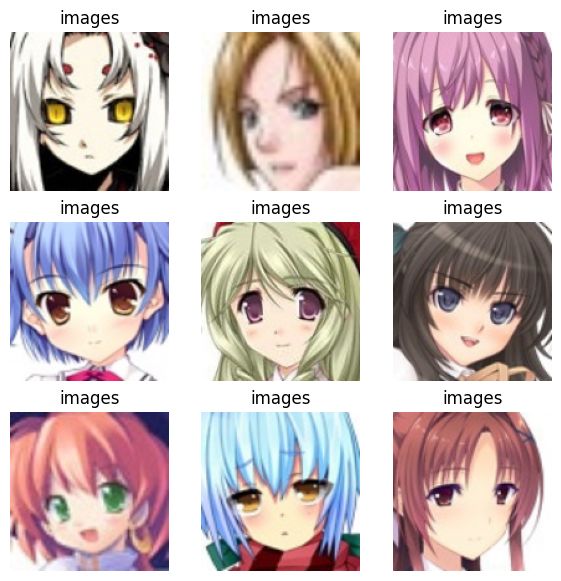

In [21]:
# Create DataLoaders
dls = anime_data_block.dataloaders(path, bs=64)

# To check a batch of images
dls.show_batch(max_n=9, figsize=(7,7))